In [44]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [45]:
PI_pickle_dump_folder = r'PI_pkl'
FD_pickle_dump_folder = r'FD_pkl'

In [46]:
final_results_dict = dict()

In [47]:
with open(fr"{PI_pickle_dump_folder}\exCost_4096_PI.pkl", 'rb') as file:
    exCost_PI = pickle.load(file)

FD_4096_final_results_dict = {4096:{'Expected Cost PI': exCost_PI,
                                    'Expected Cost UI': 1971085.2911,
                                    'Expected Resilience' : 0.9910}}

with open(fr"{FD_pickle_dump_folder}\4096\FD_4096_final_results.pkl", 'wb') as file:
    pickle.dump(FD_4096_final_results_dict, file)
    
exCost_UI = 1971085.2911
# exCost_PI = 2006133.6247
EVPI = exCost_UI - exCost_PI
p_inc = EVPI * 100 / exCost_PI
p_dec = EVPI * 100 / exCost_UI

print(f"Total Expected Cost considering perfect information: {exCost_PI:.4f}")
print(f"Total Expected Cost considering disruptions (stochastic solution): {exCost_UI:.4f}")
print(f"Expected Value of Perfect Information: {EVPI:.4f}")
print(f"Percentage Increase in Cost: {p_inc:.4f}%%")
print(f"Percentage Decrease in Cost: {p_dec:.4f}%%")

Total Expected Cost considering perfect information: 1957119.3854
Total Expected Cost considering disruptions (stochastic solution): 1971085.2911
Expected Value of Perfect Information: 13965.9057
Percentage Increase in Cost: 0.7136%%
Percentage Decrease in Cost: 0.7085%%


In [48]:
select = [1, 10, 25, 50, 75, 100, 150, 200, 300, 400, 4096]

for s in select:
    with open(fr"{FD_pickle_dump_folder}\{s}\FD_{s}_final_results.pkl", 'rb') as file:
        loaded_dict = pickle.load(file)
        if s not in final_results_dict:
            final_results_dict[s] = loaded_dict[s]
        
final_results_dict

{1: {'Expected Cost UI': 2564542.5,
  'Expected Cost FD': 2007950.267720717,
  'Expected Resilience': 0.983992017154},
 10: {'Expected Cost UI': 2562971.9449854665,
  'Expected Cost FD': 2026779.4432600024,
  'Expected Resilience': 0.98253648359375},
 25: {'Expected Cost UI': 2563264.535812806,
  'Expected Cost FD': 2116674.7570400005,
  'Expected Resilience': 0.98254038125},
 50: {'Expected Cost UI': 2564026.435429327,
  'Expected Cost FD': 2024988.049719999,
  'Expected Resilience': 0.9827081296875},
 75: {'Expected Cost UI': 2486132.2612095587,
  'Expected Cost FD': 2007950.267720717,
  'Expected Resilience': 0.983992017154},
 100: {'Expected Cost UI': 2477305.093257303,
  'Expected Cost FD': 2007950.267720717,
  'Expected Resilience': 0.983992017154},
 150: {'Expected Cost UI': 2332462.240512638,
  'Expected Cost FD': 1990393.719746136,
  'Expected Resilience': 0.985356797306},
 200: {'Expected Cost UI': 2309701.3886285834,
  'Expected Cost FD': 1986095.9128608988,
  'Expected Resi

In [52]:
with open(r'C:\Users\shivam.vedant\PycharmProjects\energiapy\docs\notebooks\supply chain\TSSP Examples\FD_pkl\25\ssoln_25_UI.pkl', 'rb') as f:
    s_dict = pickle.load(f)

print(*[(key, value) for key, value in s_dict.items() if value!=0], sep='\n')

('X_P[loc1,com1_loc1_send,0]', 1.0)
('X_P[loc1,com1_process,0]', 1.0)
('X_P[loc1,com1_store,0]', 1.0)
('X_P[loc1,com1_store_discharge,0]', 1.0)
('X_P[loc1,procure com1,0]', 1.0)
('X_P[loc2,com1_loc2_send,0]', 1.0)
('X_P[loc2,com1_process,0]', 1.0)
('X_P[loc2,com1_receive_loc1,0]', 1.0)
('X_P[loc4,com1_loc4_send,0]', 1.0)
('X_P[loc4,com1_process,0]', 1.0)
('X_P[loc4,com1_receive_loc6,0]', 1.0)
('X_P[loc5,com1_process,0]', 1.0)
('X_P[loc5,com1_receive_loc2,0]', 1.0)
('X_P[loc5,com1_receive_loc7,0]', 1.0)
('X_P[loc5,sell com1,0]', 1.0)
('X_P[loc6,com1_loc6_send,0]', 1.0)
('X_P[loc6,com1_process,0]', 1.0)
('X_P[loc6,procure com1,0]', 1.0)
('X_P[loc7,com1_loc7_send,0]', 1.0)
('X_P[loc7,com1_process,0]', 1.0)
('X_P[loc7,com1_receive_loc4,0]', 1.0)
('Cap_P[loc1,com1_loc1_send,0]', 15750.0)
('Cap_P[loc1,com1_process,0]', 15750.0)
('Cap_P[loc1,com1_store,0]', 4500.0)
('Cap_P[loc1,com1_store_discharge,0]', 4500.0)
('Cap_P[loc1,procure com1,0]', 20250.0)
('Cap_P[loc2,com1_loc2_send,0]', 15750.0)


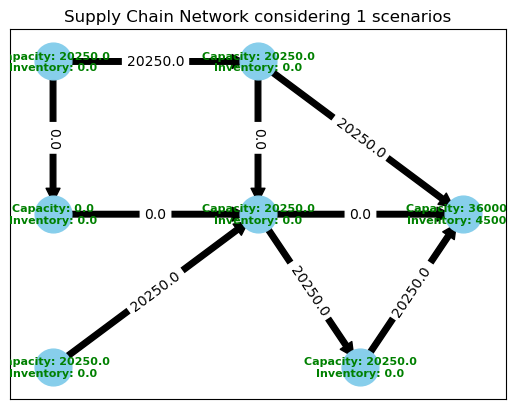

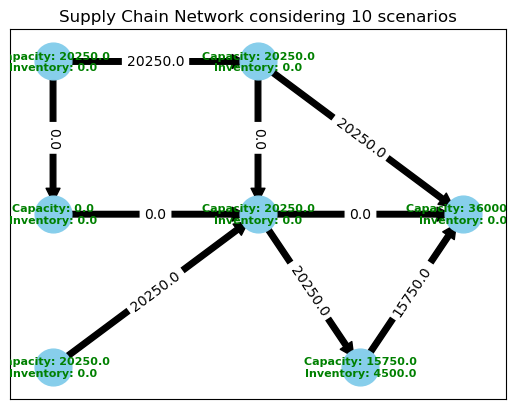

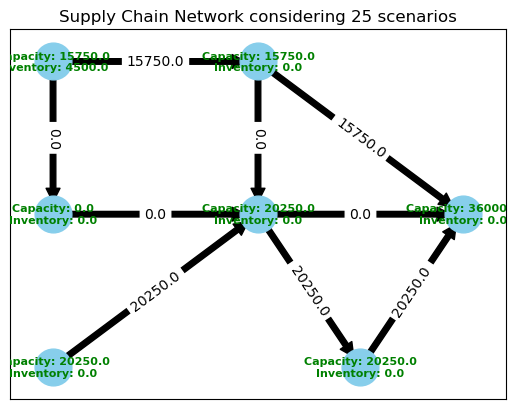

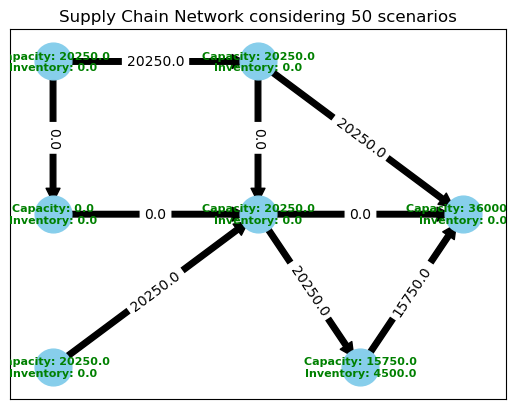

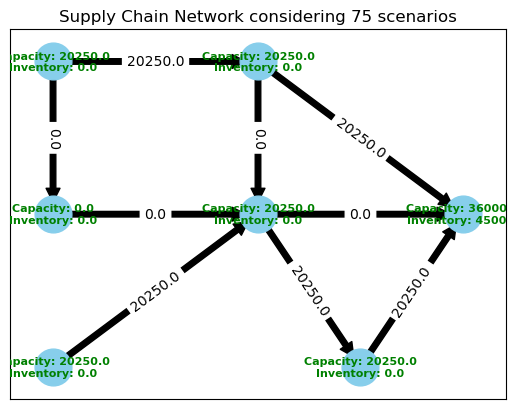

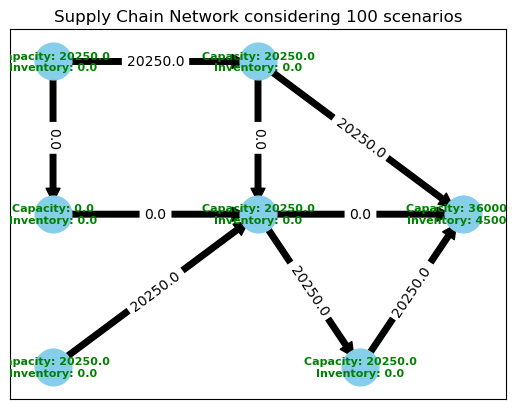

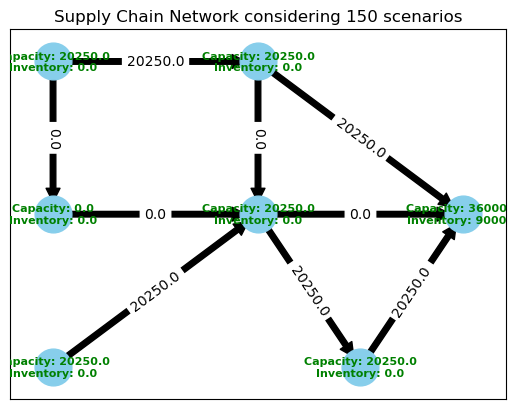

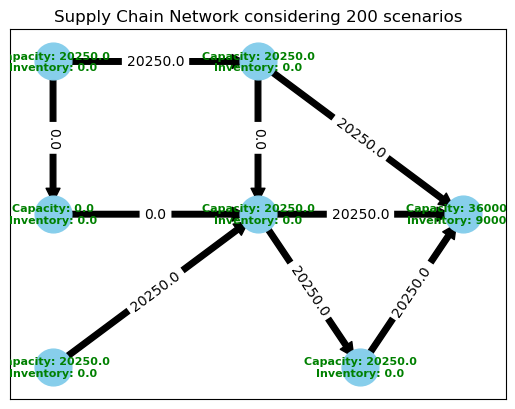

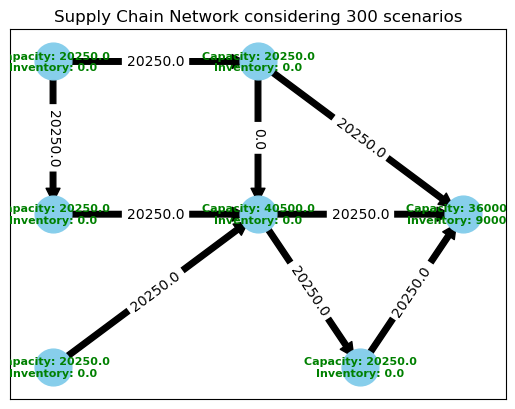

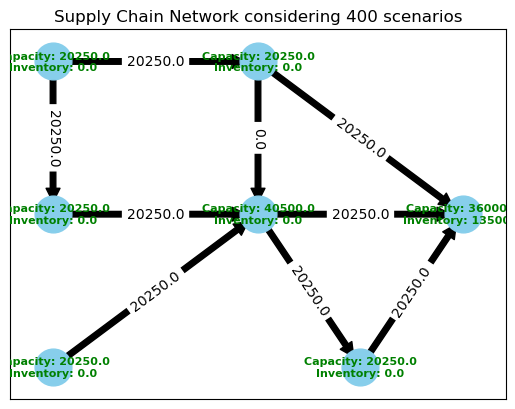

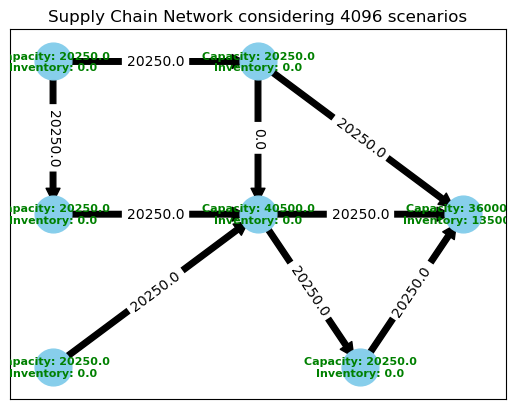

In [49]:
for s in select:
    G = nx.DiGraph()
    
    with open(fr"{FD_pickle_dump_folder}\{s}\ssoln_{s}_UI.pkl", 'rb') as file:
        ssoln_dict = pickle.load(file)
        
    nodes = {
    'Location 1': {
        'Capacity': ssoln_dict['Cap_P[loc1,com1_process,0]'] if 'Cap_P[loc1,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc1,com1_store_com1_in_stored,0]'] if 'Cap_S[loc1,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 2': {
        'Capacity': ssoln_dict['Cap_P[loc2,com1_process,0]'] if 'Cap_P[loc2,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc2,com1_store_com1_in_stored,0]'] if 'Cap_S[loc2,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 3': {
        'Capacity': ssoln_dict['Cap_P[loc3,com1_process,0]'] if 'Cap_P[loc3,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc3,com1_store_com1_in_stored,0]'] if 'Cap_S[loc3,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 4': {
        'Capacity': ssoln_dict['Cap_P[loc4,com1_process,0]'] if 'Cap_P[loc4,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc4,com1_store_com1_in_stored,0]'] if 'Cap_S[loc4,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 5': {
        'Capacity': ssoln_dict['Cap_P[loc5,com1_process,0]'] if 'Cap_P[loc5,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc5,com1_store_com1_in_stored,0]'] if 'Cap_S[loc5,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 6': {
        'Capacity': ssoln_dict['Cap_P[loc6,com1_process,0]'] if 'Cap_P[loc6,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc6,com1_store_com1_in_stored,0]'] if 'Cap_S[loc6,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 7': {
        'Capacity': ssoln_dict['Cap_P[loc7,com1_process,0]'] if 'Cap_P[loc7,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc7,com1_store_com1_in_stored,0]'] if 'Cap_S[loc7,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    }
    
    # Add nodes to the graph
    G.add_nodes_from(nodes.keys())
    
    # Define edges (connections between nodes)
    edges = [
        ('Location 1', 'Location 2', {'weight': ssoln_dict['Cap_F[loc1,loc2,truck12,0]'] if 'Cap_F[loc1,loc2,truck12,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 3', {'weight': ssoln_dict['Cap_F[loc1,loc3,truck13,0]'] if 'Cap_F[loc1,loc3,truck13,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 4', {'weight': ssoln_dict['Cap_F[loc2,loc4,truck24,0]'] if 'Cap_F[loc2,loc4,truck24,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 5', {'weight': ssoln_dict['Cap_F[loc2,loc5,truck25,0]'] if 'Cap_F[loc2,loc5,truck25,0]' in ssoln_dict.keys() else 0}),
        ('Location 3', 'Location 4', {'weight': ssoln_dict['Cap_F[loc3,loc4,truck34,0]'] if 'Cap_F[loc3,loc4,truck34,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 5', {'weight': ssoln_dict['Cap_F[loc4,loc5,truck45,0]'] if 'Cap_F[loc4,loc5,truck45,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 7', {'weight': ssoln_dict['Cap_F[loc4,loc7,truck47,0]'] if 'Cap_F[loc4,loc7,truck47,0]' in ssoln_dict.keys() else 0}),
        ('Location 6', 'Location 4', {'weight': ssoln_dict['Cap_F[loc6,loc4,truck64,0]'] if 'Cap_F[loc6,loc4,truck64,0]' in ssoln_dict.keys() else 0}),
        ('Location 7', 'Location 5', {'weight': ssoln_dict['Cap_F[loc7,loc5,truck75,0]'] if 'Cap_F[loc7,loc5,truck75,0]' in ssoln_dict.keys() else 0}),
    ]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Define fixed positions for nodes
    fixed_positions = {
        'Location 1': (-2, 2),
        'Location 2': (0, 2),
        'Location 3': (-2, 0),
        'Location 4': (0, 0),
        'Location 5': (2, 0),
        'Location 6': (-2, -2),
        'Location 7': (1, -2)
    }
    
    # Create custom labels combining multiple pieces of information
    node_labels = {node: f"Capacity: {data['Capacity']}\nInventory: {data['Inventory']}" for node, data in nodes.items()}
    
    # Draw nodes and edges with fixed positions
    nx.draw_networkx_nodes(G, fixed_positions, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, fixed_positions, edgelist=edges, arrowstyle='simple', arrowsize=20)
    nx.draw_networkx_labels(G, fixed_positions, labels=node_labels, font_size=8, font_color='green', font_weight='bold')
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels)
    
    # Show the plot
    plt.title(f"Supply Chain Network considering {s} scenarios")
    plt.show()